### Importing thr data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory data analysis

In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

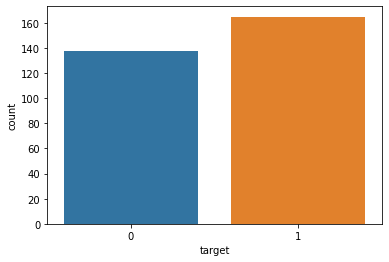

In [4]:
sns.countplot(x=df["target"])

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
### Heart frequesncy according to Sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
## Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<AxesSubplot:xlabel='sex', ylabel='count'>

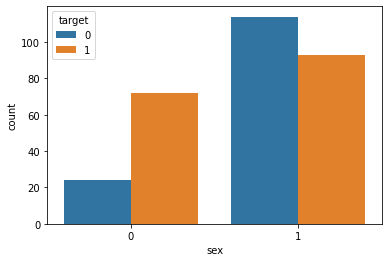

In [8]:
sns.countplot(x='sex',data=df,hue='target')

### Setting relation

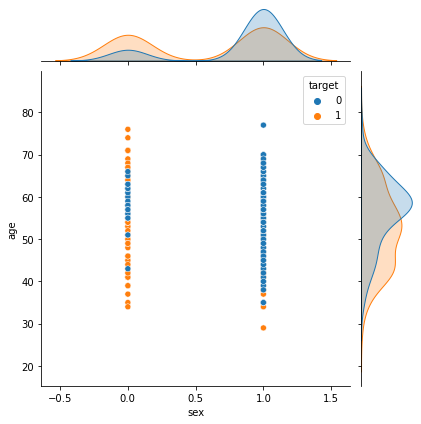

In [9]:
sns.jointplot(data=df,x='sex',y='age',hue='target')

## Age vs max HeartRate for heart Disease

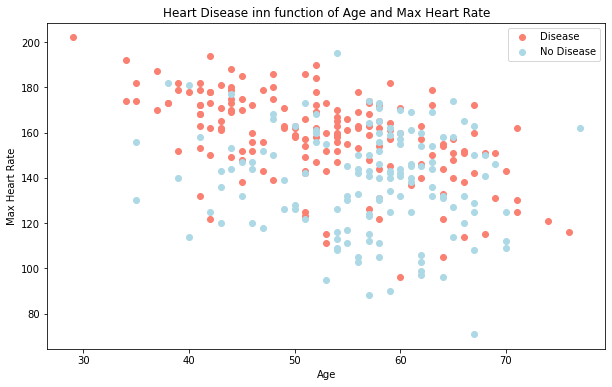

In [10]:
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
        df.thalach[df.target==1],
           c='salmon')

# Scatter with negetice example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title("Heart Disease inn function of Age and Max Heart Rate")
plt.legend(["Disease","No Disease"])

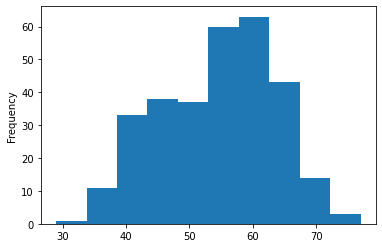

In [11]:
## Check the distribution of age column with the hiistogram
df.age.plot.hist();
# df.age.plot.kde();

## Heart disease as per chest pain type

<AxesSubplot:xlabel='cp', ylabel='count'>

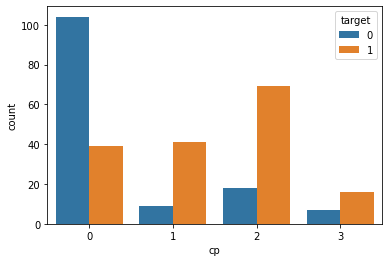

In [12]:
sns.countplot(data=df,x=df['cp'],hue=df['target'])

In [13]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp'>

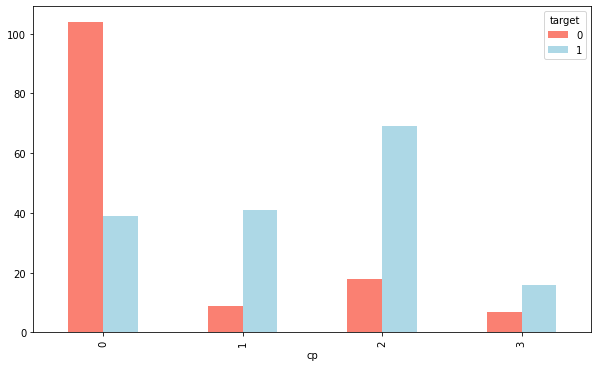

In [14]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=["salmon","lightblue"])

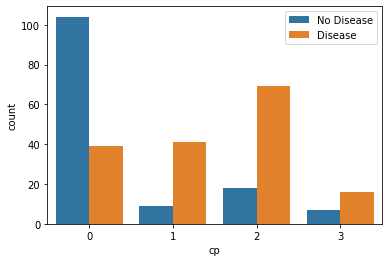

In [15]:
sns.countplot(data = df,x='cp',hue='target')
plt.legend(["No Disease","Disease"])

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


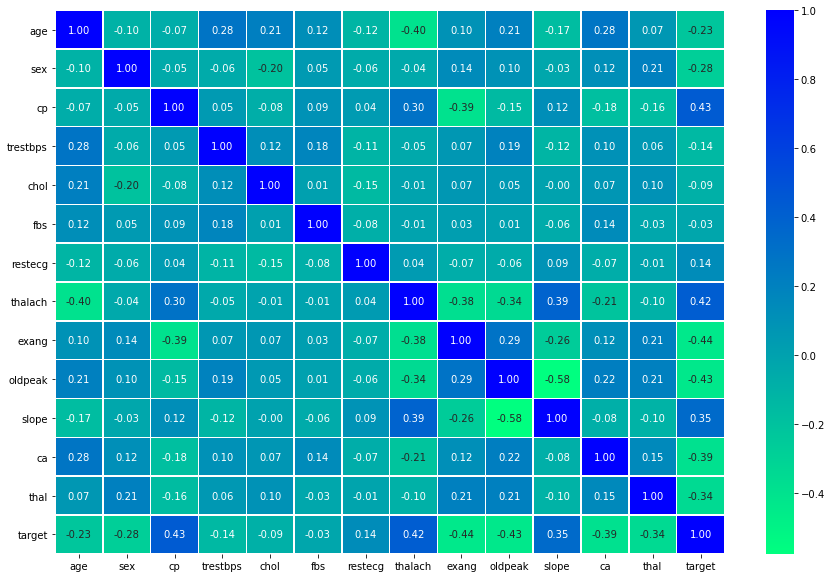

In [17]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,annot=True,
                 linewidths=0.5,fmt=".2f",
                 cmap='winter_r')

##  5. Modelling

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
## Splitting into X and y

X = df.drop('target',axis=1)
y = df['target']

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Splitting into train test split

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a funncton to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """Fits and evaluates ML Models
    models : dict of different Scikit-Learn machine Learning models
    X_train : training data
    X_test: testing data
    y_train: training labels
    y_test : test labels"""
    
    #Set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name,model in models.items():
        # fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                            y_test = y_test
                            ,y_train=y_train)
model_scores

C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

## Model Comparison

In [25]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

In [26]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.704918,0.836066


<AxesSubplot:>

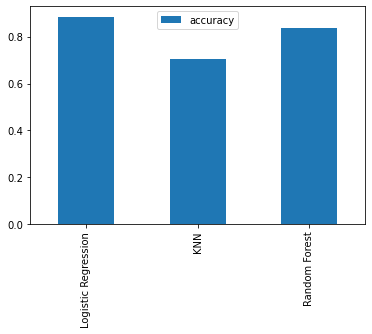

In [27]:
model_compare.T.plot.bar()

### HyperParameter Tuning

In [28]:
## Let's tune KNN

train_scores = []
test_scores = []

## Create a list for different neighbors

neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through the differennt n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [29]:
train_scores

[1.0,
 0.8016528925619835,
 0.7933884297520661,
 0.7520661157024794,
 0.768595041322314,
 0.7644628099173554,
 0.7272727272727273,
 0.7231404958677686,
 0.7066115702479339,
 0.7148760330578512,
 0.6942148760330579,
 0.6942148760330579,
 0.6818181818181818,
 0.6900826446280992,
 0.6859504132231405,
 0.6694214876033058,
 0.6900826446280992,
 0.6942148760330579,
 0.6942148760330579,
 0.7066115702479339]

In [30]:
test_scores

[0.5901639344262295,
 0.5737704918032787,
 0.6065573770491803,
 0.6065573770491803,
 0.7049180327868853,
 0.6885245901639344,
 0.7377049180327869,
 0.6721311475409836,
 0.7049180327868853,
 0.6229508196721312,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327,
 0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869]

Maximum KNN score on test date:0.7704918032786885


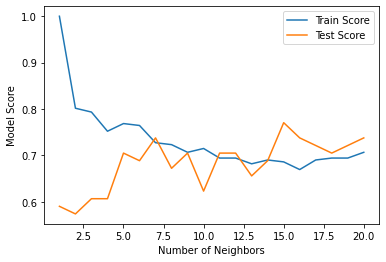

In [31]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel('Number of Neighbors')
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on test date:{max(test_scores)}")

## HyperParameter tuning using LogisticRegression

In [32]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve,precision_score,roc_curve,


## Create a hyperParameter grid for LogisticRegression
log_reg_grid ={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}
# rf_grid = {"n_estimators": np.arange(10, 1000, 50),
#            "max_depth": [None, 3, 5, 10],
#            "min_samples_split": np.arange(2, 20, 2),
#            "min_samples_leaf": np.arange(1, 20, 2)}

In [33]:
## Tune LogisticRegression

np.random.seed(42)

# Setup Random Hyperparameter Search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=1)

## Fit Random hyerparamete search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8688524590163934

In [36]:
predictions = rs_log_reg.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [37]:
cm = confusion_matrix(predictions,y_test)
cm

array([[22,  3],
       [ 5, 31]], dtype=int64)

In [38]:
np.random.seed(42)
### Now tuning hyperparameter for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=1)

## Fit Ranndom HyperParameter
rs_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=1)

In [39]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [40]:
## Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8032786885245902

In [41]:
predictions1 = rs_rf.predict(X_test)
predictions1

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [42]:
cf1 = confusion_matrix(y_test,predictions1)
cf1

array([[20,  7],
       [ 5, 29]], dtype=int64)

## Now usng gridSearchCv

In [44]:
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5, verbose=True)

# fit grid hyperparameter Search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
## Check the  best hyper parameter
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [47]:
gs_log_reg.score(X_test,y_test)

0.8688524590163934

In [48]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

### Evaluating the model

In [50]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

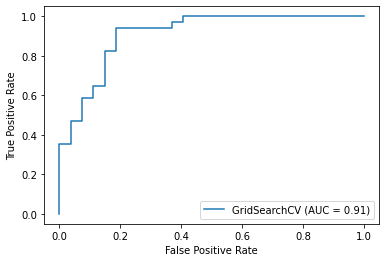

In [52]:
## Roc curve and calculate AUC metric
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg,X_test,y_test)


In [58]:
# confusion metrics
cm = confusion_matrix(y_preds,y_test)
cm

array([[22,  3],
       [ 5, 31]], dtype=int64)

<AxesSubplot:>

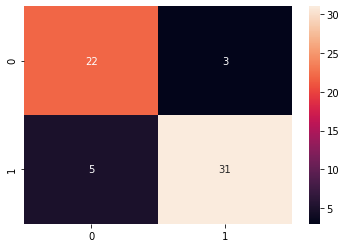

In [60]:
sns.heatmap(cm,annot=True)

In [61]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



### Cross Validation

We are going to calculate pericision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [62]:
## check best hyperparmas
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [65]:
clf = LogisticRegression(C= 4.893900918477489,
                        solver= 'liblinear')

clf

LogisticRegression(C=4.893900918477489, solver='liblinear')

In [70]:
## Cross validation accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,X,y,
                        cv=5,scoring='accuracy')

# we can pass entire X and Y as we are using cross validation

cv_acc

array([0.81967213, 0.86885246, 0.83606557, 0.86666667, 0.71666667])

In [71]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8215846994535518

In [73]:
## Cross-validation Precision
cv_precision = cross_val_score(clf,X,y,cv=5,
                              scoring="precision")

cv_precision

array([0.78947368, 0.90322581, 0.84848485, 0.83783784, 0.71052632])

In [102]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8179096985548598

In [78]:
## Cross validation Recall
cv_recall = cross_val_score(clf,X,y,cv=5,
                        scoring='recall')
cv_recall

array([0.90909091, 0.84848485, 0.84848485, 0.93939394, 0.81818182])

In [79]:
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [84]:
## Cros-validated f1 score
cv_f1 = cross_val_score(clf,X,y,cv=5,
                              scoring='f1')
cv_f1

array([0.84507042, 0.875     , 0.84848485, 0.88571429, 0.76056338])

In [88]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8429665874032072

In [121]:
### Visualize the cross_validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1},
                          index=[0])


cv_metrics

,Accuracy,Precision,Recall,F1
0,0.821585,0.81791,0.872727,0.842967


<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

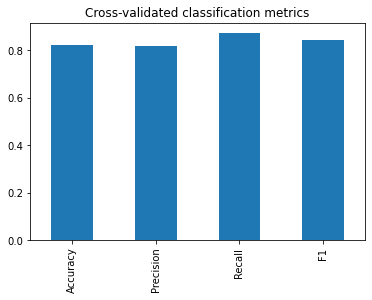

In [125]:
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False)

### Feature Importance

In [128]:
## Fit an instannce of LogisticRegression

clf = LogisticRegression(C=4.893900918477489,
                        solver = 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=4.893900918477489, solver='liblinear')

In [129]:
clf.coef_

array([[ 0.00658101, -1.40421082,  0.82281351, -0.01227649, -0.00464752,
         0.20643245,  0.56491786,  0.02500077, -0.76632714, -0.54568692,
         0.64465593, -0.82406195, -1.00880454]])

In [130]:
## Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.006581006191365142,
 'sex': -1.4042108164145495,
 'cp': 0.8228135123578887,
 'trestbps': -0.01227649017214509,
 'chol': -0.004647519479525184,
 'fbs': 0.206432448744499,
 'restecg': 0.564917864561874,
 'thalach': 0.025000770110288825,
 'exang': -0.7663271444480236,
 'oldpeak': -0.5456869153123489,
 'slope': 0.6446559314403565,
 'ca': -0.8240619536026202,
 'thal': -1.008804540596773}

In [131]:
## Visualise feature importannce
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.006581,-1.404211,0.822814,-0.012276,-0.004648,0.206432,0.564918,0.025001,-0.766327,-0.545687,0.644656,-0.824062,-1.008805


<AxesSubplot:title={'center':'Feature Importance'}>

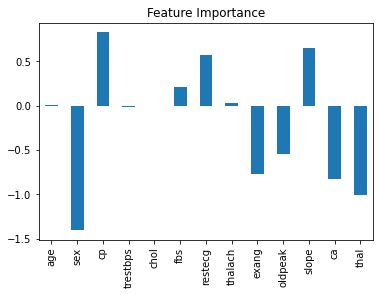

In [133]:
feature_df.T.plot.bar(title='Feature Importance',legend=False)

In [134]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
! git add Heart_Disease_Classification.ipynb
! git commit -m "14:17/12-07-2021"
! git push origin main

fatal: pathspec ''Heart_Disease_Classification.ipynb'' did not match any files


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../Matplotlib/Matplotlib_intro.ipynb
	modified:   ../Numpy/Numpy_intro.ipynb
	modified:   ../Pandas/Intro_pandas.ipynb
	modified:   ../SkLearn/Car_Preprocessing_using_sklearn.ipynb
	modified:   ../SkLearn/Choosing_model_Classification.ipynb
	modified:   ../SkLearn/Choosing_model_regression.ipynb
	modified:   ../SkLearn/Putting_all_together.ipynb
	modified:   ../SkLearn/SkLearn_Intro.ipynb
	modified:   ../SkLearn/Tuning_Hyperparameter.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.virtual_documents/
	./
	../Matplotlib/.ipynb_checkpoints/
	../Matplotlib/car-sales-missing-data.csv
	../Matplotlib/car-sales.csv
	../Matplotlib/sample.png
	../Numpy/.ipynb_checkpoints/
	../Pandas/.ipynb_checkpoints/
	../SkLearn/.